<a href="https://colab.research.google.com/github/ringochuchudull/Folder-Structure-Conventions/blob/master/Ringo_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In this notebook, Sclögl's system for non-equilibrium phase transitions will be demonstrated and simulated using Gillespie algorithm.

##### Import libraries for notebook

In [0]:
import multiprocessing # Attempt for algorimic speed up

import numpy as np
import matplotlib.pyplot as plt
import scipy as s
import random

import math

#### Step1:  Perform initialisation procedures: 
-  Define initial concentration of c1, c2, c3 and c4

-  Specify the maximum time step and count.

-  Initialise lists to store time steps and concentration for species $X$ 

In [0]:
c1 = 4.7876 * 10**4
c2 = 9.98 * 10**3
c3 = 7.0739 * 10**2
c4 = 16.544 

energy_constant = [c1,c2,c3,c4]

t=0
max_t=10

step=0
max_steps= 100000000

X_INIT = 1

plot_system = []
plot_system.append(X_INIT)
time_delta = []
time_delta.append(t)

#### Define h-factor and propensities for the system

\begin{equation*}
\alpha_j(X) = c_jh_j(x)
\end{equation*}

where $h_1(X) =1,$
$h_2(X) =X,$
$ h_3(X) =\frac{X(X-1)}{2} ,$
$ h_4(X) =\frac{X(X-1)(X-2)}{6} $
 
 and $j$ ranges from 1 to 4



In [0]:
def hfactor_q2(X, n, c=energy_constant):
    if n==0:
        return 1*c[0]
    elif n==1:
        return c[1]*X
    elif n==2:
        return c[2]*X*(X-1)/2
    elif n==3:
        return c[3]*X*(X-1)*(X-2)/6
    else:
        raise Exception


In [0]:
X = X_INIT
while step < max_steps and t < max_t:    
    
    a0 = []
    for i in range(0,4):
        tempo = hfactor_q2(X, i, c=energy_constant)
        a0.append(tempo)
    total_a0 = sum(a0)
    
    r1, r2 =  np.random.rand(2)   ##Should be uniform

    T = (1/total_a0)*np.log(1/r1)

    
    #------Step2.6----------------
    def finder(r2,a0,a):

        # initialise (want to get the first consecutive interval of the sum of propensity (a) )
        j = 1

        # first consecutive interval of the sum of propensity (a)
        aj_sum = a[j-1]

        # while loop for selecting process (checking if r2*a0 in within the consecutive interval)
        while j <= len(a):  # there are only 4 possible intervals (since the array a has only 4 propensity values)

            # since r2*a0 < a0
            if r2 * a0 > aj_sum:  # if not in (greater than), then j+1 (get to the next consecutive interval)
                j = j + 1
                aj_sum = aj_sum + a[j-1]  # also update the sum of propensity (a)

            else:  # if yes it lies in the interval, stop
                break

        # output j (or at which interval, only 4 outputs, {1,2,3,4})
        return j  
    mu = finder(r2, total_a0, a0)
    
    
    cmp = total_a0*r2
    j = 1
    lhs, rhs =0, 0

    while j < 5:
        #print(j)    
        lhs += a0[j-1-1]
        if lhs < cmp:
            rhs = lhs+a0[j-1]
            if cmp <= rhs:
                break
        j+=1   
        
    mu = j
    mu = finder(r2, total_a0, a0)
    # Update time
    t += T

    # Update concentration
    if mu == 1:
        X+= 1
    elif mu == 2:
        X-= 1
    elif mu == 3:
        X+= 1
    elif mu == 4:
        X-=1
    else:
        print('Mu = ' + str(mu))
    

    #Update reaction counter
    step +=1 
    
    temp_var = step
    if temp_var % 500000 == 0:
        print('steps:', step, 'Time value', t)
    
    plot_system.append(X)
    time_delta.append(t)


steps: 500000 Time value 0.606090940652883
steps: 1000000 Time value 0.9286595786149019
steps: 1500000 Time value 1.370388016305295
steps: 2000000 Time value 2.1888247348183567
steps: 2500000 Time value 2.69865878721198
steps: 3000000 Time value 3.4015760335511662
steps: 3500000 Time value 4.16489026237804
steps: 4000000 Time value 4.762201840367087
steps: 4500000 Time value 5.474981955709334
steps: 5000000 Time value 6.1978525812659715
steps: 5500000 Time value 6.737908495691242
steps: 6000000 Time value 8.144530936900837
steps: 6500000 Time value 8.646140889327597
steps: 7000000 Time value 8.825527447389632
steps: 7500000 Time value 9.193685760145069


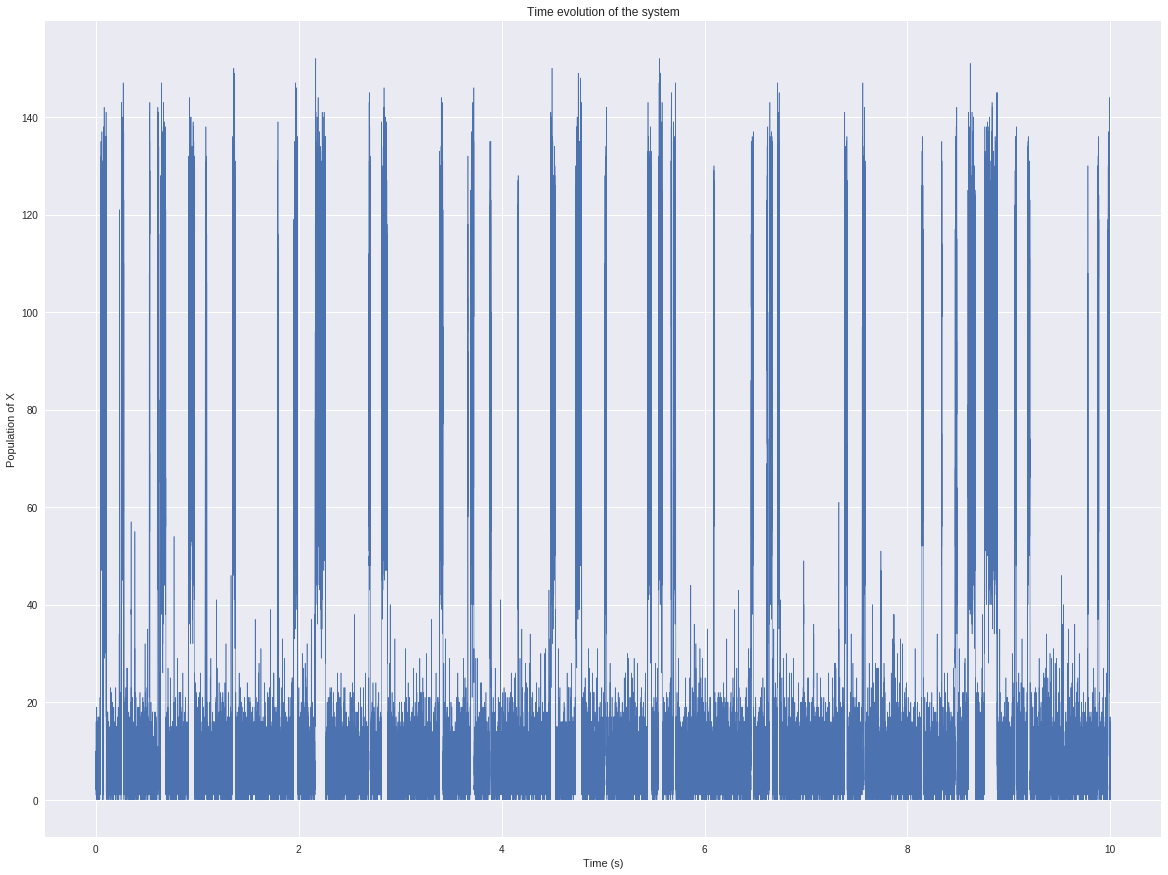

In [0]:
plt.figure(figsize=(20,15))
plt.plot(time_delta,plot_system,linewidth=0.6)
plt.xlabel('Time (s)')
plt.ylabel('Population of X')
plt.title('Time evolution of the system')
plt.grid(True)

In [0]:
import scipy.io as io
simulation_data = {}
simulation_data['plot_system'] = plot_system
simulation_data['time_delta'] = time_delta
io.savemat("data.mat", simulation_data)


In [0]:
import scipy.io as io
simulation_data = io.loadmat("data.mat")
plot_system = simulation_data['plot_system'][0]
time_delta = simulation_data['time_delta'][0]

In [0]:
print(len(time_delta))
print(len(plot_system))


print(time_delta[-20])
print(plot_system[1:20])

dt = 0.001
target_list = []; target_list.append(time_delta[0])

target = 0
plot_hist = {}
for t, x in zip(time_delta, plot_system):
    #print(t,x)
    if t > target:
        target += dt
        if x not in plot_hist:
            plot_hist[x] = 1
        else:
            plot_hist[x] += 1


7848672
7848672
9.999922140238638
[2 3 4 5 4 3 2 3 4 5 4 3 4 5 6 7 6 5 6]


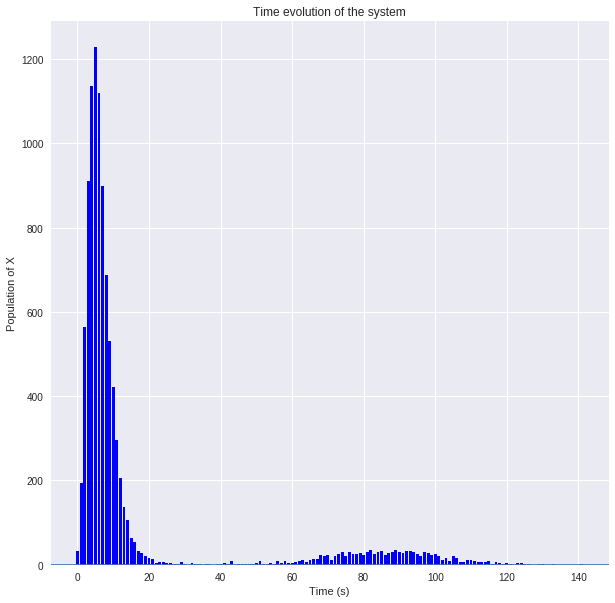

In [0]:
plt.figure(figsize=(10,10))
plt.bar(list(plot_hist.keys()), plot_hist.values(), color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Population of X')
plt.title('Time evolution of the system')
plt.grid(True)
plt.axhline()
plt.show()
